<a href="https://colab.research.google.com/github/Naren8520/Python/blob/main/Visualizando_modelos_de_regresi%C3%B3n_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Visualizando modelos de regresión**
Muchos conjuntos de datos contienen múltiples variables cuantitativas y el objetivo de un análisis suele ser relacionar esas variables entre sí. Nosotros previamente discutido funciones que pueden lograr esto mostrando la distribución conjunta de dos variables. Sin embargo, puede ser muy útil utilizar modelos estadísticos para estimar una relación simple entre dos conjuntos de observaciones ruidosas. Las funciones discutidas en este capítulo lo harán a través del marco común de regresión lineal.

Las gráficas de regresión en seaborn están destinadas principalmente a agregar una guía visual que ayude a enfatizar los patrones en un conjunto de datos durante los análisis de datos exploratorios. Es decir, seaborn no es en sí mismo un paquete de análisis estadístico. Para obtener medidas cuantitativas relacionadas con el ajuste de los modelos de regresión, debe utilizar statsmodels . Sin embargo, el objetivo de seaborn es hacer que la exploración de un conjunto de datos a través de la visualización sea rápida y fácil, ya que hacerlo es tan (si no más) importante que explorar un conjunto de datos a través de tablas de estadísticas.

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
sns.set_theme(color_codes=True)

In [ ]:
sns.get_dataset_names()

In [ ]:
tips=sns.load_dataset("tips")
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


## **Funciones para dibujar modelos de regresión lineal**
Se utilizan dos funciones principales en seaborn para visualizar una relación lineal determinada mediante regresión. Estas funciones, `regplot()` y `lmplot()` están estrechamente relacionados y comparten gran parte de su funcionalidad del núcleo. Sin embargo, es importante comprender en qué se diferencian, de modo que pueda elegir rápidamente la herramienta correcta para un trabajo en particular.

En la invocación más simple, ambas funciones dibujan un diagrama de dispersión de dos variables $x$ y $y$, y luego ajustan el modelo de regresión y trazan la línea de regresión resultante y un intervalo de confianza del 95% para esa regresión:$y \sim x$

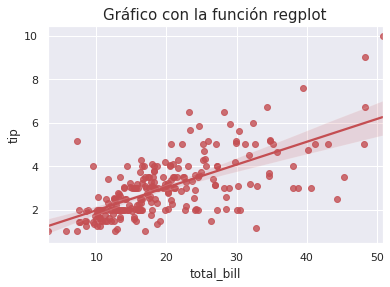

In [ ]:
plt.title("Gráfico con la función regplot", fontsize=15)
sns.regplot(x="total_bill", y="tip", color="r" ,data=tips);

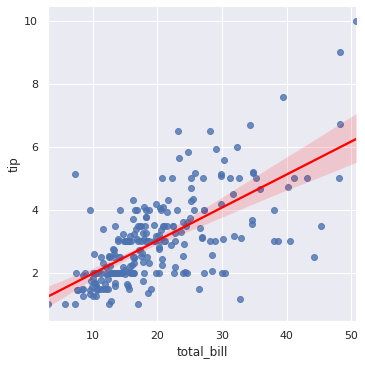

In [ ]:
#plt.title("Gráfico con la función lmplot")

sns.lmplot(x="total_bill", y="tip",  data=tips, line_kws={'color': 'red'} );

Debe tener en cuenta que los gráficos resultantes son idénticos, excepto que las formas de las figuras son diferentes. Explicaremos por qué esto es así en breve. Por ahora, la otra diferencia principal que debe conocer es que `regplot()` acepta las variables $x$ y $y$ en una variedad de formatos que incluyen matrices numpy simples, Seriesobjetos pandas o como referencias a variables en un DataFrameobjeto pandas al que se pasa data. Por el contrario, `lmplot()` tiene como data parámetro obligatorio y las variables $x$ y $y$ deben especificarse como cadenas. Este formato de datos se denomina datos de *"formato largo" o "ordenados"* . Aparte de esta flexibilidad de entrada, `regplot()` posee un subconjunto de `lmplot()` características, por lo que las demostraremos usando la última.

Es posible ajustar una regresión lineal cuando una de las variables toma valores discretos, sin embargo, el diagrama de dispersión simple producido por este tipo de conjunto de datos a menudo no es óptimo:

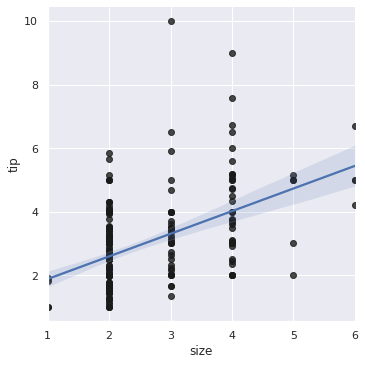

In [ ]:
#la función scatter_kws permite cambiar los colores de los puntos
sns.lmplot(x="size", y="tip", data=tips, scatter_kws={'color': 'k'});

Una opción es agregar algo de ruido aleatorio ("jitter") a los valores discretos para que la distribución de esos valores sea más clara. Tenga en cuenta que la fluctuación se aplica solo a los datos del diagrama de dispersión y no influye en el ajuste de la línea de regresión:

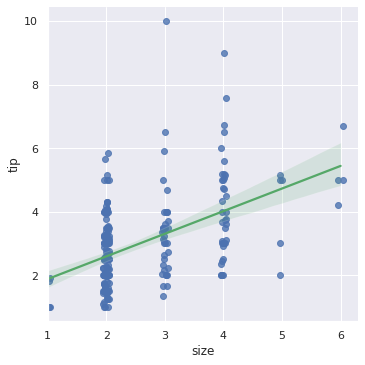

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05, line_kws={'color': 'g'});

Una segunda opción es colapsar las observaciones en cada intervalo discreto para trazar una estimación de la tendencia central junto con un intervalo de confianza:

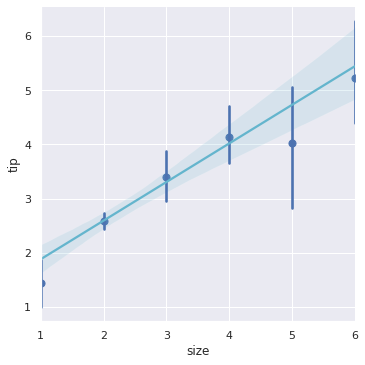

In [ ]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean, line_kws={'color': 'c'});

## **Adaptación de diferentes tipos de modelos**

El modelo de regresión lineal simple utilizado anteriormente es muy simple de ajustar, sin embargo, no es apropiado para algunos tipos de conjuntos de datos. El conjunto de datos del cuarteto de Anscombe muestra algunos ejemplos en los que la regresión lineal simple proporciona una estimación idéntica de una relación en la que la inspección visual simple muestra claramente diferencias. Por ejemplo, en el primer caso, la regresión lineal es un buen modelo:

In [ ]:
anscombe = sns.load_dataset("anscombe")

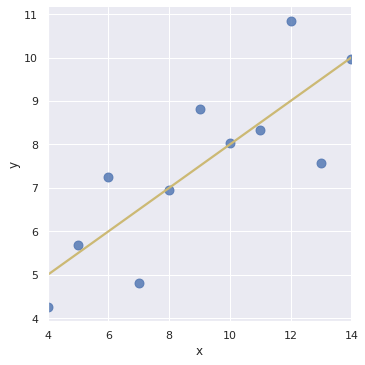

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80}, line_kws={'color': 'y'});

La relación lineal en el segundo conjunto de datos es la misma, pero el gráfico muestra claramente que este no es un buen modelo:

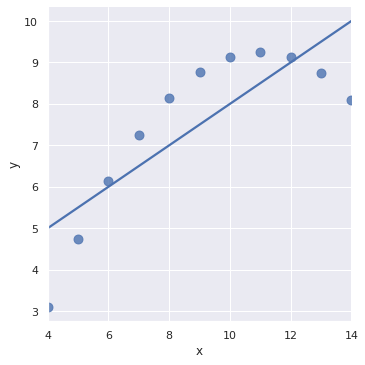

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

En presencia de este tipo de relaciones de orden superior, lmplot()y regplot()puede ajustarse a un modelo de regresión polinomial para explorar tipos simples de tendencias no lineales en el conjunto de datos:

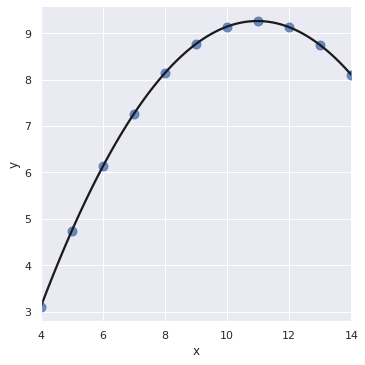

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80},line_kws={'color': 'k'});

Un problema diferente lo plantean las observaciones "atípicas" que se desvían por alguna razón distinta a la relación principal en estudio:

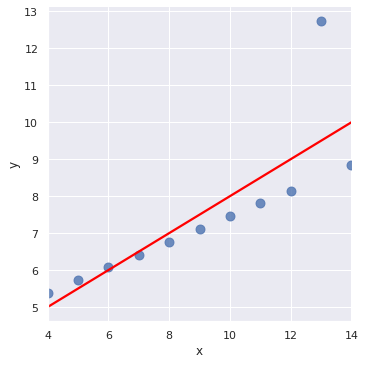

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80}, line_kws={'color': 'red'});

En presencia de valores atípicos, puede ser útil ajustar una regresión robusta, que utiliza una función de pérdida diferente para reducir la ponderación de residuos relativamente grandes:

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


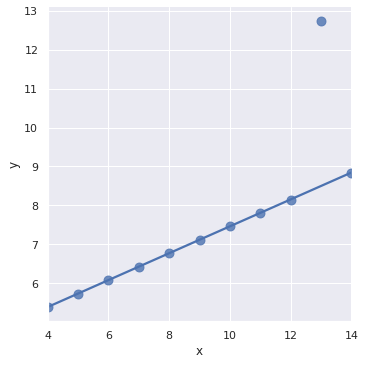

In [ ]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

Cuando la $y$ variable es binaria, la regresión lineal simple también "funciona" pero proporciona predicciones inverosímiles:

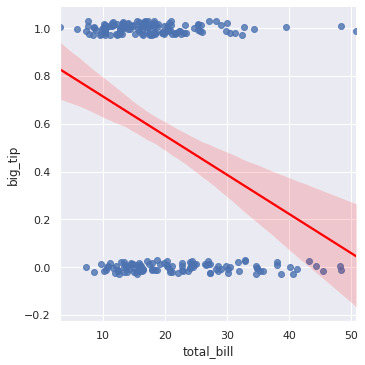

In [ ]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips, line_kws={'color': 'red'},
           y_jitter=.03);

La solución en este caso es ajustar una regresión logística, de modo que la línea de regresión muestre la probabilidad estimada de para un valor dado de :$y = 1x$

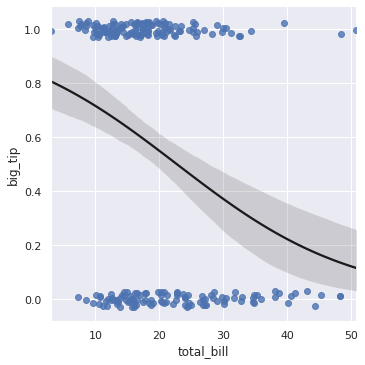

In [ ]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03, line_kws={'color': 'k'});

Tenga en cuenta que la estimación de la regresión logística es considerablemente más intensiva desde el punto de vista computacional (esto también es cierto para la regresión robusta) que la regresión simple, y como el intervalo de confianza alrededor de la línea de regresión se calcula mediante un procedimiento de arranque, es posible que desee desactivarlo para más rápido iteración (usando ci=None).

Un enfoque completamente diferente consiste en ajustar una regresión no paramétrica utilizando un suavizador más bajo . Este enfoque tiene la menor cantidad de supuestos, aunque es computacionalmente intensivo y, por lo tanto, actualmente los intervalos de confianza no se calculan en absoluto:

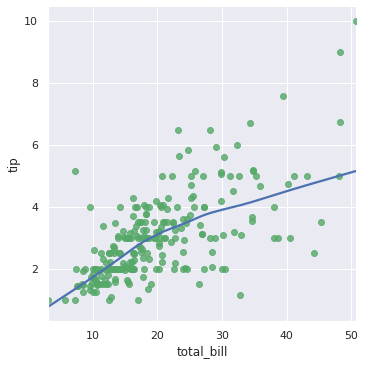

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True, scatter_kws={"color":"g"});

La funcion `residplot()`puede ser una herramienta útil para verificar si el modelo de regresión simple es apropiado para un conjunto de datos. Ajusta y elimina una regresión lineal simple y luego traza los valores residuales para cada observación. Idealmente, estos valores deberían estar distribuidos aleatoriamente :$y = 0$

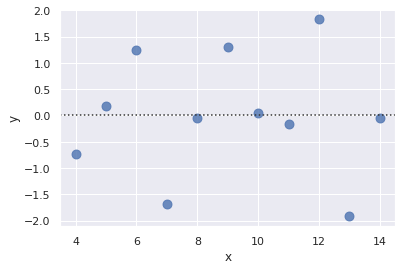

In [ ]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

Si hay estructura en los residuos, sugiere que la regresión lineal simple no es apropiada:

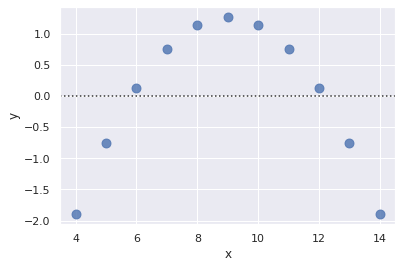

In [ ]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## **Condicionamiento de otras variables**

Los gráficos anteriores muestran muchas formas de explorar la relación entre un par de variables. A menudo, sin embargo, una pregunta más interesante es "¿cómo cambia la relación entre estas dos variables en función de una tercera variable?" Aquí es donde aparece la diferencia entre `regplot()` y `lmplot()`. Si bien `regplot()` siempre muestra una sola relación, se `lmplot()` combina `regplot()` con FacetGridpara proporcionar una interfaz fácil para mostrar una regresión lineal en gráficos "facetados" que le permiten explorar interacciones con hasta tres variables categóricas adicionales.

La mejor manera de separar una relación es trazar ambos niveles en los mismos ejes y usar el color para distinguirlos:

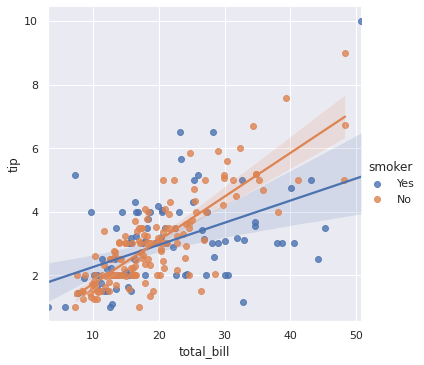

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

Además del color, es posible utilizar diferentes marcadores de diagramas de dispersión para que los diagramas se reproduzcan mejor en blanco y negro. También tienes control total sobre los colores utilizados:

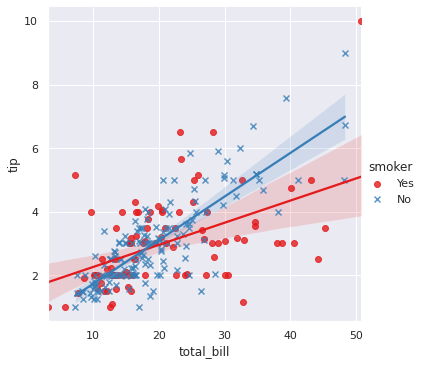

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1")

Para agregar otra variable, puede dibujar múltiples "facetas" que aparecen en cada nivel de la variable en las filas o columnas de la cuadrícula:

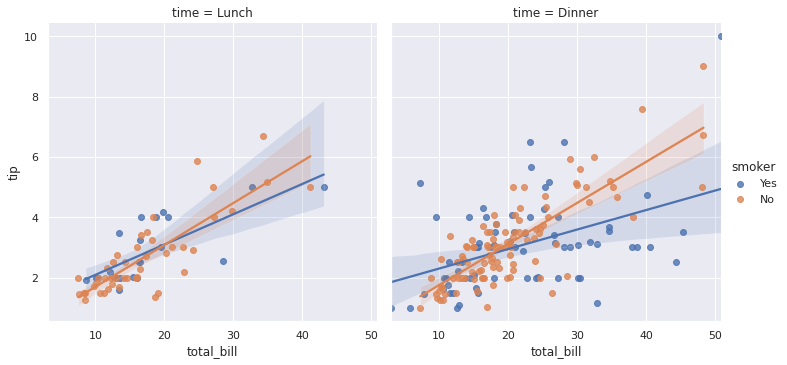

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

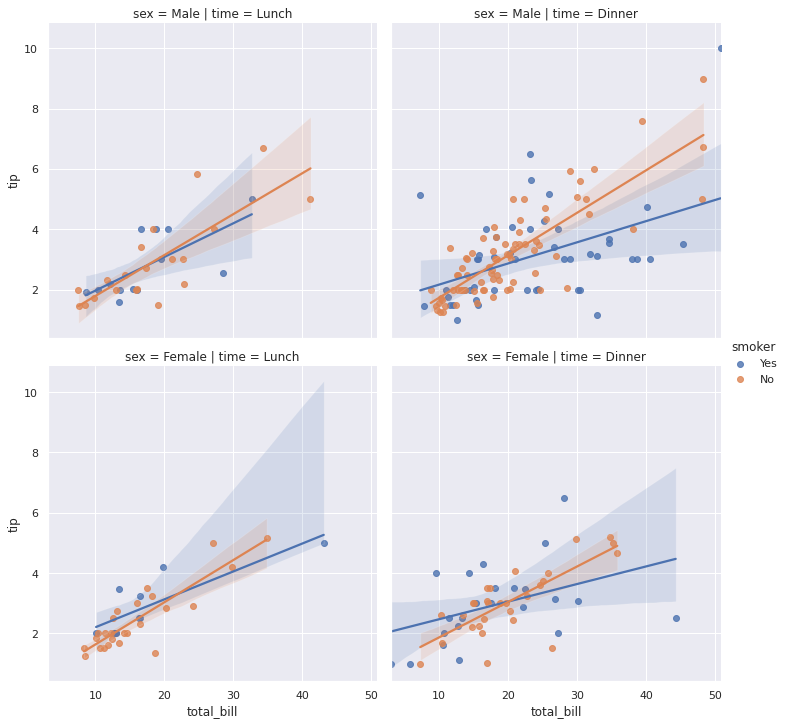

In [ ]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## **Controlando el tamaño y la forma de la parcela**

Antes notamos que los gráficos predeterminados hechos por `regplot()` y se `lmplot()` ven iguales pero en ejes que tienen un tamaño y forma diferente. Esto se debe a regplot()que una función de "nivel de ejes" se basa en ejes específicos. Esto significa que usted mismo puede hacer figuras de varios paneles y controlar exactamente dónde va la gráfica de regresión. Si no se proporciona explícitamente ningún objeto de ejes, simplemente usa los ejes "actualmente activos", razón por la cual el gráfico predeterminado tiene el mismo tamaño y forma que la mayoría de las otras funciones de matplotlib. Para controlar el tamaño, debe crear un objeto de figura usted mismo.

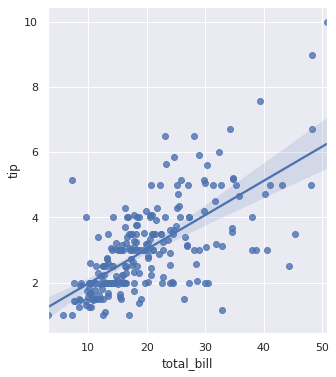

In [ ]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

Por el contrario, el tamaño y la forma de la `lmplot()` figura se controlan a través de la interfaz **FacetGrid** utilizando los parámetros heighty aspect, que se aplican a cada faceta del gráfico, no a la figura general en sí:

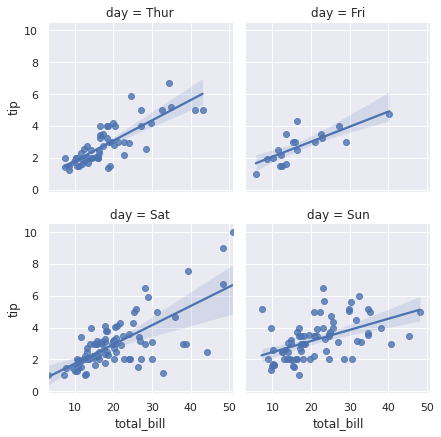

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

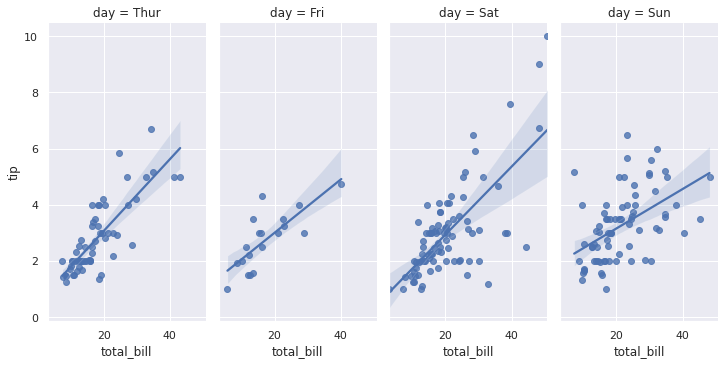

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## **Trazar una regresión en otros contextos**

Algunas otras funciones nacidas del mar se utilizan `regplot()` en el contexto de una trama más grande y compleja. La primera es la función `jointplot()`  que presentamos en el tutorial de distribuciones . Además de los estilos de trazado discutidos anteriormente, se `jointplot()` puede usar `regplot()` para mostrar el ajuste de regresión lineal en los ejes de articulación pasando `kind="reg"`:

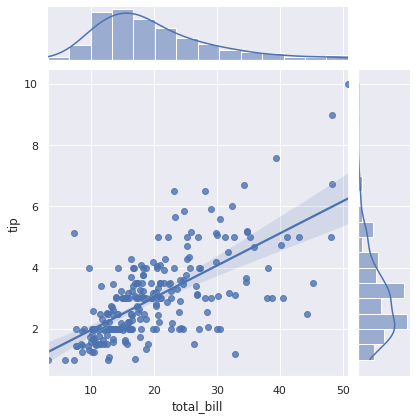

In [ ]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

Usar la función `pairplot()` con `kind="reg"` combinaciones `regplot()` y `PairGrid` para mostrar la relación lineal entre variables en un conjunto de datos. Tenga cuidado de notar en qué se diferencia de `lmplot()`. En la figura siguiente, los dos ejes no muestran la misma relación condicionada a dos niveles de una tercera variable; más bien, PairGrid()se usa para mostrar múltiples relaciones entre diferentes pares de variables en un conjunto de datos:

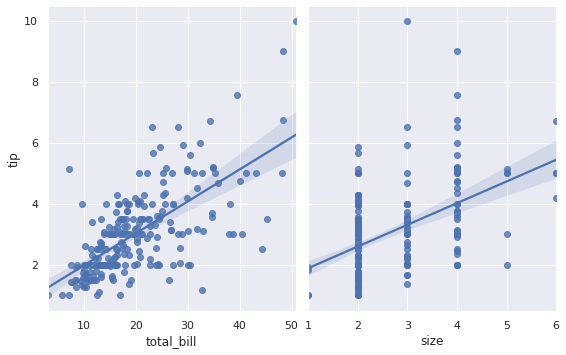

In [ ]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

Me gusta `lmplot()`, pero a diferencia `jointplot()`, el condicionamiento de una variable categórica adicional está integrado en el `pairplot()` uso del hueparámetro:

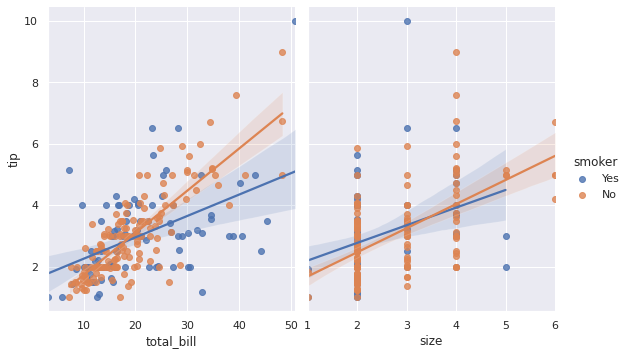

In [ ]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");